**Задание**

Постройте модель, используя архитектуру со свёрточными слоями, для классификации Fashion MNIST. Итоговое качество (accuracy) должно быть не ниже 89,5.

Инструкция к выполнению задания

Скачайте тренировочную и тестовою часть датасета Fashion MNIST
Постройте архитектуру модели, используя свёрточные слои, слои регуляризации и один финальный полносвязный слой
Обучите модель до необходимого качества. Если сеть не обучается до необходимого качества, попробуйте поменять архитектуру сети, варьируя параметры свёрток, количество каналов, количество свёрточных слоёв, слои регуляризации, тип оптимайзера и т. д.
Формат сдачи работы
Прикрепите ссылку на готовое решение в личном кабинете. Работу можно отправлять в виде ссылки на python-ноутбук из GitHub, Google Colaboratory или аналогичных платформ. Не забудьте открыть доступ на просмотр и комментирование.

In [3]:
import torchvision as tv
import time
import matplotlib.pyplot as plt

In [4]:
import torch
from torch import nn

In [5]:
BATCH_SIZE = 256

In [6]:
transforms = tv.transforms.Compose([
    tv.transforms.Resize(32),
    tv.transforms.ToTensor()
])

In [7]:
train_dataset = tv.datasets.FashionMNIST('.',
                                  train=True,
                                  transform=transforms,
                                  download=True)

test_dataset = tv.datasets.FashionMNIST('.',
                                 train=False,
                                 transform=transforms,
                                 download=True)

train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

100%|██████████| 26421880/26421880 [00:02<00:00, 11114410.39it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 198275.80it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3703614.83it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17963624.79it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [8]:
train_dataset[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 9)

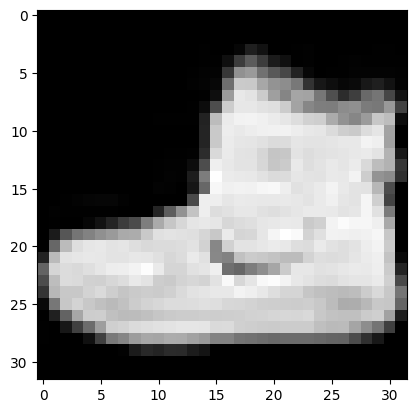

In [ ]:
plt.imshow(train_dataset[0][0].numpy().reshape(32,32), cmap='gray');

In [9]:
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=5, padding=0),
    nn.Tanh(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(32, 64, kernel_size=5),
    nn.Tanh(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(64, 120, kernel_size=5),
    nn.Flatten(),
    nn.Linear(120, 84),
    nn.Tanh(),
    nn.Linear(84, 10)
)

In [10]:

from torchsummary import summary

summary(model, input_size=(1, 32, 32), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             832
              Tanh-2           [-1, 32, 28, 28]               0
         AvgPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 10, 10]          51,264
              Tanh-5           [-1, 64, 10, 10]               0
         AvgPool2d-6             [-1, 64, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]         192,120
           Flatten-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             Tanh-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 255,230
Trainable params: 255,230
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [11]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 32, 32)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 32, 32])
Layer Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 32, 28, 28])
Layer Tanh(). X shape: torch.Size([1, 32, 28, 28])
Layer AvgPool2d(kernel_size=2, stride=2, padding=0). X shape: torch.Size([1, 32, 14, 14])
Layer Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 64, 10, 10])
Layer Tanh(). X shape: torch.Size([1, 64, 10, 10])
Layer AvgPool2d(kernel_size=2, stride=2, padding=0). X shape: torch.Size([1, 64, 5, 5])
Layer Conv2d(64, 120, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 120, 1, 1])
Layer Flatten(start_dim=1, end_dim=-1). X shape: torch.Size([1, 120])
Layer Linear(in_features=120, out_features=84, bias=True). X shape: torch.Size([1, 84])
Layer Tanh(). X shape: torch.Size([1, 84])
Layer Linear(in_features=84, out_features=10, bias=True). X shape: torch.Size([1, 10])


In [12]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 32, 32)
y = model(X)
print(y.shape)

torch.Size([1, 10])


In [13]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [14]:
def train(net, train_iter, test_iter, optimizer, num_epochs):
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()

        for X, y in train_iter:
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]

        test_acc = evaluate_accuracy(test_iter, net)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}' \
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [15]:
lr, num_epochs = 0.001, 20
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train(model, train_iter, test_iter, optimizer, num_epochs)

epoch 1, loss 0.0027, train acc 0.751, test acc 0.815, time 107.2 sec
epoch 2, loss 0.0018, train acc 0.839, test acc 0.840, time 104.8 sec
epoch 3, loss 0.0016, train acc 0.856, test acc 0.854, time 104.4 sec
epoch 4, loss 0.0014, train acc 0.867, test acc 0.861, time 104.0 sec
epoch 5, loss 0.0014, train acc 0.874, test acc 0.865, time 104.0 sec
epoch 6, loss 0.0013, train acc 0.879, test acc 0.868, time 105.3 sec
epoch 7, loss 0.0012, train acc 0.885, test acc 0.869, time 104.2 sec
epoch 8, loss 0.0012, train acc 0.888, test acc 0.876, time 103.9 sec
epoch 9, loss 0.0012, train acc 0.892, test acc 0.875, time 104.2 sec
epoch 10, loss 0.0011, train acc 0.896, test acc 0.879, time 105.2 sec
epoch 11, loss 0.0011, train acc 0.900, test acc 0.882, time 103.9 sec
epoch 12, loss 0.0010, train acc 0.903, test acc 0.883, time 104.2 sec
epoch 13, loss 0.0010, train acc 0.905, test acc 0.885, time 104.7 sec
epoch 14, loss 0.0010, train acc 0.907, test acc 0.889, time 104.5 sec
epoch 15, loss 